## Google Bigquery Project
Yifei Wang

In [ ]:
from google.cloud import bigquery
import matplotlib

In [2]:
client = bigquery.Client()

Step 1 – Execute Query

In [16]:
query_job = client.query(
    """
    SELECT
      CONCAT(
        'https://stackoverflow.com/questions/',
        CAST(id as STRING)) as url,
      view_count
    FROM `bigquery-public-data.stackoverflow.posts_questions`
    WHERE tags like '%google-bigquery%'
    ORDER BY view_count DESC
    LIMIT 10"""
)

results = query_job.result() 

Step 2 – Load into Pandas

In [17]:
df = results.to_dataframe()

/Users/sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.
  """Entry point for launching an IPython kernel.


Step 3 – Display Data using Pandas

In [21]:
df

,url,view_count
0,https://stackoverflow.com/questions/35159967,73082
1,https://stackoverflow.com/questions/22879669,70332
2,https://stackoverflow.com/questions/10604135,70323
3,https://stackoverflow.com/questions/27060396,52700
4,https://stackoverflow.com/questions/16609219,52361
5,https://stackoverflow.com/questions/39919815,51946
6,https://stackoverflow.com/questions/11057219,50016
7,https://stackoverflow.com/questions/11647201,48451
8,https://stackoverflow.com/questions/39109817,47762
9,https://stackoverflow.com/questions/13530967,47732


Step 4 – Data Visualizaon using Pandas /
Seaborn / Matplotlib

AttributeError: 'AxesSubplot' object has no attribute 'show'

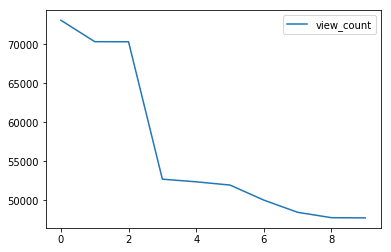

In [19]:
df.plot().show()

Step 5 – Aggregaon with Pre and Post Filtering

In [33]:
query_job = client.query(
    """
    SELECT
      date,
      channelGrouping as channel,
      sum(totals.visits) as max_visits
    FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
    WHERE channelGrouping != 'Organic Search'
    GROUP BY date, channel
    HAVING max_visits > 50
"""
)

results = query_job.result() 

In [34]:
df = results.to_dataframe()

/Users/sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.
  """Entry point for launching an IPython kernel.


In [35]:
df

,date,channel,max_visits
0,20170801,Direct,400
1,20170801,Referral,436
2,20170801,Paid Search,70
3,20170801,Affiliates,52
4,20170801,Social,213


Step 6 – Left Outer Join

In [42]:
query_job = client.query(
    """
    SELECT
  *
FROM
  `bigquery-public-data.san_francisco.bikeshare_trips` b
LEFT Outer JOIN `bigquery-public-data.san_francisco.sffd_service_calls` s
ON b.zip_code = s.zipcode_of_incident
limit 10
"""
)

df = query_job.result().to_dataframe()
df

/Users/sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.
  del sys.path[0]


,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,number_of_alarms,unit_type,unit_sequence_in_call_dispatch,fire_prevention_district,supervisor_district,neighborhood_district,location,row_id,latitude,longitude
0,116477,1617,2013-12-05 14:16:00+00:00,San Pedro Square,6,2013-12-05 14:43:00+00:00,MLK Library,11,11,30079,...,None,None,None,None,None,None,None,None,None,None
1,116476,1640,2013-12-05 14:16:00+00:00,San Pedro Square,6,2013-12-05 14:43:00+00:00,MLK Library,11,37,30079,...,None,None,None,None,None,None,None,None,None,None
2,655413,2989,2015-02-24 07:57:00+00:00,2nd at Folsom,62,2015-02-24 08:47:00+00:00,2nd at Folsom,62,541,49413,...,None,None,None,None,None,None,None,None,None,None
3,30350,14013,2013-09-22 11:18:00+00:00,2nd at Folsom,62,2013-09-22 15:11:00+00:00,2nd at Folsom,62,634,6113,...,None,None,None,None,None,None,None,None,None,None
4,656916,459,2015-02-24 22:22:00+00:00,Market at 4th,76,2015-02-24 22:29:00+00:00,2nd at Folsom,62,401,49413,...,None,None,None,None,None,None,None,None,None,None
5,1264269,696,2016-07-04 15:23:00+00:00,Powell at Post (Union Square),71,2016-07-04 15:34:00+00:00,2nd at Folsom,62,504,2127,...,None,None,None,None,None,None,None,None,None,None
6,212505,371,2014-03-13 11:47:00+00:00,5th at Howard,57,2014-03-13 11:54:00+00:00,5th at Howard,57,637,30189,...,None,None,None,None,None,None,None,None,None,None
7,798881,70,2015-06-08 18:01:00+00:00,5th at Howard,57,2015-06-08 18:02:00+00:00,5th at Howard,57,317,98105,...,None,None,None,None,None,None,None,None,None,None
8,381278,697,2014-07-26 14:36:00+00:00,Townsend at 7th,65,2014-07-26 14:48:00+00:00,5th at Howard,57,209,20005,...,None,None,None,None,None,None,None,None,None,None
9,1263984,269,2016-07-03 19:50:00+00:00,Powell Street BART,39,2016-07-03 19:54:00+00:00,5th at Howard,57,449,90240,...,None,None,None,None,None,None,None,None,None,None


Step 7 – Set Operaon

In [43]:
query_job = client.query(
    """
        SELECT
  links.id,
  links.post_id,
  links.creation_date
FROM
  `bigquery-public-data.stackoverflow.post_links` links
UNION ALL 
select history.id,
  history.post_id,
  history.creation_date from `bigquery-public-data.stackoverflow.post_history` history
limit 10
"""
)

df = query_job.result().to_dataframe()
df

/Users/sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.


,id,post_id,creation_date
0,108506220,34808162,2016-01-15 09:39:42.923000+00:00
1,108506360,34808201,2016-01-15 09:42:28.993000+00:00
2,108506639,34808279,2016-01-15 09:46:51.480000+00:00
3,108506640,34808279,2016-01-15 09:46:51.480000+00:00
4,108506641,34808279,2016-01-15 09:46:51.480000+00:00
5,108507250,34808449,2016-01-15 09:55:42.750000+00:00
6,108507493,34808507,2016-01-15 09:59:37.657000+00:00
7,108508557,34808783,2016-01-15 10:15:13.227000+00:00
8,108508558,34808783,2016-01-15 10:15:13.227000+00:00
9,108508559,34808783,2016-01-15 10:15:13.227000+00:00


Step 8 – Private Dataset

In [45]:
query_job = client.query(
    """
        SELECT
  *
FROM
  `shining-incline-279711.w205.w205_private_dataset` l
limit 10
"""
)

df = query_job.result().to_dataframe()
df

/Users/sarah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: PyarrowMissingWarning: Converting to a dataframe without pyarrow installed is often slower and will become unsupported in the future. Please install the pyarrow package.
  # This is added back by InteractiveShellApp.init_path()


,id,post_id,creation_date
0,225336948,62603085,2020-06-26 21:30:06.510000+00:00
1,225338639,62603509,2020-06-26 22:14:08.150000+00:00
2,225338640,62603509,2020-06-26 22:14:08.150000+00:00
3,225338641,62603509,2020-06-26 22:14:08.150000+00:00
4,225338799,62603546,2020-06-26 22:17:04.767000+00:00
5,225340754,62604050,2020-06-26 23:07:58.033000+00:00
6,225340755,62604050,2020-06-26 23:07:58.033000+00:00
7,225340756,62604050,2020-06-26 23:07:58.033000+00:00
8,225341178,62604175,2020-06-26 23:22:09.617000+00:00
9,225341179,62604175,2020-06-26 23:22:09.617000+00:00
